# IMPORT LIBRARIES

In [115]:
#---------------------------------------------------------------------------------------------------------------------------
# Vijay Jagpal
# National charity client - Python machine learning project 
#---------------------------------------------------------------------------------------------------------------------------
# Modules needed
import sys
# scipy  for statistics
import scipy
# numpy for array, matrix and vector calculations
# work horses of tables (dataframe) and arrays
import numpy as np
# matplotlib for graphs
import pandas as pd 
# scikit-learn for machine learning

import sklearn
from sklearn import datasets, linear_model

# graphs 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# model selection
from sklearn import model_selection

# kpi: evaulating the performance of the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# the stars of the show: the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Machine Learning Algorithm
from sklearn.ensemble import RandomForestClassifier

#------------------------------------------------------------------------------------------------

# Test and train dataset split
from sklearn import model_selection

# switch off pandas warning 
#pd.options.mode.chained_assignment = None

# used to write the model to a file
from sklearn.externals import joblib

We are using pandas to load the data. 

Note that we are specifying the names of each column when loading the data.

In [59]:
#Read the Donor Raw data_ML 
#data is a dataframe 
data = pd.read_csv('C:\\Users\VKJag\Desktop\Donor Raw Data_ML.csv')
#head
print(data.head(15).transpose())

                                0      1      2      3      4      5      6   \
TARGET_B                         0      1      0      0      0      0      0   
TARGET_D                       NaN     10    NaN    NaN    NaN    NaN    NaN   
CONTROL_NUMBER                   5     12     37     38     41     52     53   
MONTHS_SINCE_ORIGIN            101    137    113     92    101    101     89   
DONOR_AGE                       87     79     75    NaN     74     63     71   
IN_HOUSE                         0      0      0      0      0      0      0   
URBANICITY                       ?      R      S      U      R      U      R   
SES                              ?      2      1      2      2      3      3   
CLUSTER_CODE                     .     45     11     04     49     08     50   
HOME_OWNER                       H      H      H      H      U      U      H   
DONOR_GENDER                     M      M      F      F      F      M      M   
INCOME_GROUP                     2      

In [116]:
# columns
print(data.columns)

Index(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'SES', 'CLUSTER_CODE',
       'HOME_OWNER', 'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE',
       'OVERLAY_SOURCE', 'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOME_VALUE',
       'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME',
       'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'RECENCY_STATUS_96NK',
       'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
       'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
       'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
       'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER

We are extracting variables possibly affecting target variable FREQUENCY_STATUS_97K. This variable indicates the    
donations frequency of the donor as at a given point in time i.e. June 1997.

Check for missing values

This is the best place to deal with data and missing data.

In [117]:
# Extract the donor data into a Dataframe to get an insight into the data
column_list = ['PER_CAPITA_INCOME','MEDIAN_HOUSEHOLD_INCOME','RECENT_AVG_GIFT_AMT','LAST_GIFT_AMT','LIFETIME_GIFT_AMOUNT','LIFETIME_GIFT_COUNT','LIFETIME_AVG_GIFT_AMT','SES','MOR_HIT_RATE','FREQUENCY_STATUS_97NK','RECENT_CARD_RESPONSE_COUNT','TARGET_B']
donor_data = data[column_list]
#
print(donor_data.head(20))

    PER_CAPITA_INCOME  MEDIAN_HOUSEHOLD_INCOME  RECENT_AVG_GIFT_AMT  \
0               11855                      294                15.00   
1               10385                      212                15.00   
2               30855                      405                21.67   
3               16342                      153                13.44   
4               12107                      328                17.50   
5                6851                      182                 8.33   
6                5900                      122                18.67   
7               12667                      189                 5.00   
8                8132                      180                 5.00   
9               11428                      307                 8.60   
10               6519                      179                 8.67   
11               9042                      163                80.00   
12              13841                      256                 3.50   
13    

In [118]:
# Extract the donor data into a Dataframe to get an insight into the data
column_list = ['CARD_PROM_12', 'NUMBER_PROM_12','TARGET_B']
donor_data = data[column_list]
#
print(donor_data.head(20))

    CARD_PROM_12  NUMBER_PROM_12  TARGET_B
0              5              12         0
1              7              21         1
2             11              32         0
3             11              33         0
4              6              19         0
5              9              20         0
6              7              18         0
7              9              24         1
8             11              25         0
9             11              27         1
10            11              35         0
11             9              21         0
12            11              27         0
13             4              10         0
14             9              22         1
15             6              15         0
16            11              29         1
17            11              27         0
18            10              28         0
19             8              21         0


In [119]:
# Extract the donor data into a Dataframe to get an insight into the data
column_list = ['FREQUENCY_STATUS_97NK','RECENT_CARD_RESPONSE_COUNT','TARGET_B']
donor_data = data[column_list]
#
print(donor_data.head(20))

    FREQUENCY_STATUS_97NK  RECENT_CARD_RESPONSE_COUNT  TARGET_B
0                       1                           0         0
1                       2                           2         1
2                       3                           6         0
3                       3                           4         0
4                       1                           1         0
5                       4                           1         0
6                       1                           3         0
7                       4                           4         1
8                       4                           5         0
9                       3                           4         1
10                      4                           4         0
11                      1                           2         0
12                      4                           7         0
13                      1                           0         0
14                      2               

# Summarise the Dataset

We look at the data a few different ways:

1. Dimensions of the dataset.
2. Peek at the data itself.
3. Statistical summary of all attributes.
4. Breakdown of the data by the class variable.


### 1. Dimensions of Dataset
We get an idea of how many instances (rows) 
and how many attributes (columns) the data
contains with the shape property.

In [120]:
# shape
print(donor_data.shape)
print(donor_data.columns.values)
#print(dataset.shape)
#print(dataset.columns.values)

(19372, 3)
['FREQUENCY_STATUS_97NK' 'RECENT_CARD_RESPONSE_COUNT' 'TARGET_B']


### 2. Peek at the Data

In [121]:
# head
print(donor_data.head(20))

    FREQUENCY_STATUS_97NK  RECENT_CARD_RESPONSE_COUNT  TARGET_B
0                       1                           0         0
1                       2                           2         1
2                       3                           6         0
3                       3                           4         0
4                       1                           1         0
5                       4                           1         0
6                       1                           3         0
7                       4                           4         1
8                       4                           5         0
9                       3                           4         1
10                      4                           4         0
11                      1                           2         0
12                      4                           7         0
13                      1                           0         0
14                      2               

In [122]:
# transpose
print(donor_data.head(20).transpose())

                            0   1   2   3   4   5   6   7   8   9   10  11  \
FREQUENCY_STATUS_97NK        1   2   3   3   1   4   1   4   4   3   4   1   
RECENT_CARD_RESPONSE_COUNT   0   2   6   4   1   1   3   4   5   4   4   2   
TARGET_B                     0   1   0   0   0   0   0   1   0   1   0   0   

                            12  13  14  15  16  17  18  19  
FREQUENCY_STATUS_97NK        4   1   2   2   4   1   4   2  
RECENT_CARD_RESPONSE_COUNT   7   0   5   1   5   2   4   3  
TARGET_B                     0   0   1   0   1   0   0   0  


### 3. Statistical Summary
Take a look at a summary of each attribute.
This includes the count, mean, the min and max values as well as some percentiles.

In [123]:
# descriptions
desc = donor_data.describe().transpose()
print(desc)


                              count      mean       std  min  25%  50%   75%  \
FREQUENCY_STATUS_97NK       19372.0  1.983998  1.099346  1.0  1.0  2.0  3.00   
RECENT_CARD_RESPONSE_COUNT  19372.0  1.730539  1.535521  0.0  1.0  1.0  2.00   
TARGET_B                    19372.0  0.250000  0.433024  0.0  0.0  0.0  0.25   

                            max  
FREQUENCY_STATUS_97NK       4.0  
RECENT_CARD_RESPONSE_COUNT  9.0  
TARGET_B                    1.0  


### 4 Class Distribution
We take a look at the number of instances (rows) that belong to each class.
We can view this as an absolute count.

In [125]:
#here i'm creating an array
#Xs = dataset[[ '']].value
Xs = donor_data[['NUMBER_PROM_12']].values
#print(Xs)

Ys = donor_data[['CARD_PROM_12']].values

# MASSIVE WARNING
# Y and X same length
# Y and X same order
print(len(Xs),len(Ys))

NameError: name 'dataset' is not defined

In [126]:
#### Split the data into training/testing sets ####
l =len (Xs)
TwPct = round(l*20/100)
print(TwPct)

X_train = Xs[: -TwPct]  # 80%
X_test = Xs[ -TwPct:]   # 20%
# print(len(X_test))

3874


In [127]:
# Split the targets into training/testing sets
Y_train =Ys[: -TwPct] #80%
Y_test = Ys[-TwPct :] #20%

# Create linear regression object -> it's a class object
# sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
regr = linear_model.LinearRegression(fit_intercept=True) # options between the brackets

# Train the model using the training sets
# Learning happening
regr.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = regr.predict(X_test)
#print(Y_pred)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('R-Square: %.2f' % r2_score(Y_test, Y_pred))

# Let's go live now!

# Here I deal with new data records / actual  data

# 1 step is get data exatly has it was for learning
# same columns, no missing values
# X_new 


# 2nd step is to producce the target variable
# Y_new = regr.predict(X_new)



# Plot outputs only to use with one Xs variable

plt.scatter(X_test, Y_test,  color='chartreuse')
plt.plot(X_test, Y_pred, color='fuchsia', linewidth=3)

plt.xticks(())
plt.yticks(())

Coefficients: 
 [[0.15696662]]


NameError: name 'mean_squared_error' is not defined

In [128]:
# class distribution
print(donor_data.groupby('LIFETIME_GIFT_AMOUNT').size())
# 

KeyError: 'LIFETIME_GIFT_AMOUNT'

# Data Visualisation

We are going to look at two types of plots:

Univariate plots to better understand each attribute.

Multivariate plots to better understand the relationships between attributes.

### 1 Univariate Plots
We plot each individual variable.
This gives us a much clearer idea of the distribution of the input attributes:

Given that the input variables are numeric, we can create box and whisker plots of each.
box and whisker plots

In [129]:
# drawing box plots, one graph with 4 subplots, i do not share axes
#donor_data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
#
donor_data.plot
#plt.boxplot([donor_data.plot])
plt.ylabel
plt.xlabel
plt.show()

In [140]:
# the main axes is subplot(111) by default
donor_data.plot
#plt.xlabel(donor_data(LIFETIME_GIFT_COUNT))
#plt.ylabel(donor_data(LIFETIME_GIFT_AMOUNT))
plt.title('Test correllation')
plt.show()


NameError: name 'LIFETIME_GIFT_COUNT' is not defined

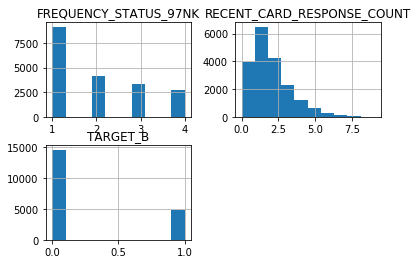

In [131]:
# We create a histogram for each input variable to get an idea of the distribution.

# histograms
donor_data.hist()
plt.show()

### 2 Multivariate Plots

Now we look at the interactions between the variables.
Let’s look at scatterplots of all pairs of attributes. 
This can be helpful to spot structured relationships between input variables.

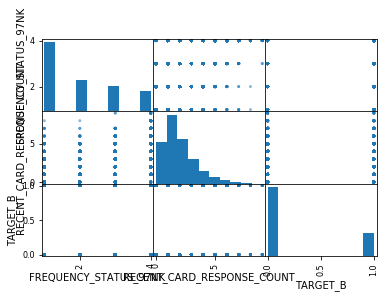

In [132]:
# scatter plot matrix
scatter_matrix(donor_data)
plt.show()

# Note the diagonal grouping of some pairs of attributes. 
# This suggests a high correlation and a predictable relationship.

In [133]:
print(donor_data.corr())

                            FREQUENCY_STATUS_97NK  RECENT_CARD_RESPONSE_COUNT  \
FREQUENCY_STATUS_97NK                    1.000000                    0.634182   
RECENT_CARD_RESPONSE_COUNT               0.634182                    1.000000   
TARGET_B                                 0.137343                    0.126241   

                            TARGET_B  
FREQUENCY_STATUS_97NK       0.137343  
RECENT_CARD_RESPONSE_COUNT  0.126241  
TARGET_B                    1.000000  


We get an idea from the plots that some of the classes are partially linearly separable 
in some dimensions, so we are expecting generally good results.




# Evaluate Some Algorithms

Now we try to model the data and then estimate their accuracy on unseen / new data.

We follow those steps:

1 / Separate out a validation dataset.
2 / Set-up the test harness to use 10-fold cross validation.
3 / Build 7 different models to predict from 
4 / Select the best model.

### 1/ Create a Validation Dataset

We need to evaluate the models we created.

Later, we use statistical methods to estimate the accuracy 
of the models that we create on unseen data.

We also want a more concrete estimate of the accuracy of the best model 
on unseen data by evaluating it on actual unseen data.

To do that we are holding back some data that the algorithms will not get to see
and we will use this data to get a second and independent idea 
of how accurate the best model might actually be.

We will split the loaded dataset into two, 80% of which we will use to train our models
and 20% that we will hold back as a validation dataset.

In [134]:
# Split-out validation dataset

# here we convert the pandas dataframe into an array of figures
array = donor_data.values
# the dimensions of the donor parts

# Note : for array [rows , columns] 
# rows separated from column by comma

# features/ variables
X = array[:,0:4]
#print(X)
# target:  what we want to predict or learn
# Y needs to be one column only
Y = array[:,1]
#print(Y)
# the percentage of the dataset in the test set
validation_size = 0.20

# the random seed a we are sampling randomly our data
# that is we select the lines in the 2 different set randomly
seed = 21

# Split-out validation dataset
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# we now have X_train and Y_train for preparing models
# and  X_validation and Y_validation we can use later.



### 2. Test Harness

We use 10-fold cross validation to estimate accuracy.
This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

In [135]:
# Test options and evaluation metric
seed = 19
scoring = 'accuracy'

# We are using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

### 3. Build Models

We don’t  really  know which algorithms would be good on this problem 
or what configurations to use. 

We evaluate 7 different algorithms used for classification:

linear models: 
Logistic Regression (LR)
Linear Discriminant Analysis (LDA)

non linear models
K-Nearest Neighbors (KNN)
Classification and Regression Trees (CART)
Gaussian Naive Bayes (NB)
Support Vector Machines (SVM)
RandomForestClassifier

We reset the random number seed before each run to ensure 
that the evaluation of each algorithm is performed 
using exactly the same data splits. 
It ensures the results are directly comparable.



In [136]:
# Spot Check Algorithms: a list of the models we are going to use
models = []
models.append(('LR', LogisticRegression())) # no correlation please /independent vars
models.append(('LDA', LinearDiscriminantAnalysis())) # no correlation please /independent vars
models.append(('KNN', KNeighborsClassifier())) #K Neighbours
models.append(('CART', DecisionTreeClassifier())) # Decision Tree
models.append(('NB', GaussianNB())) # Naive Bayes
models.append(('SVM', SVC())) # Support Vector Machine SVM / no correlation please /independent vars
models.append(('RF', RandomForestClassifier())) # anything goes


In [137]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    #print(name, ":", cv_results.mean(), cv_results.std())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.615601 (0.013407)
LDA: 0.374329 (0.013745)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-

KNN: 0.999935 (0.000194)
CART: 1.000000 (0.000000)
NB: 0.999935 (0.000194)
SVM: 0.999935 (0.000194)
RF: 0.999548 (0.000581)


### 4. Select Best Model

We now have 7 models and accuracy estimations for each. 
We need to compare the models to each other and select the most accurate.

We can see that it looks like KNN has the largest estimated accuracy score.

We can also create a plot of the model evaluation results and compare the spread 
and the mean accuracy of each model. 

There is a population of accuracy measures for each algorithm because each algorithm 
was evaluated 10 times (10 fold cross validation).


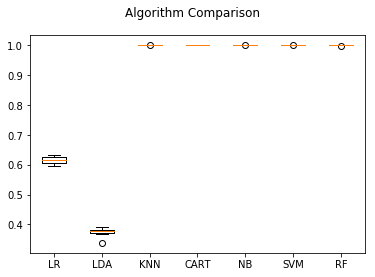

In [138]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#You can see that the box and whisker plots are squashed at the top of the range, with many samples achieving 100% accuracy.


### Make Predictions

The SVM (support vecotr machine is the most accurate model that we tested. 

Now we want to get an idea of the accuracy of the model on our validation set.

This will give us an independent final check on the accuracy of the best model.
It is valuable to keep a validation set just in case you made a slip during training, 
such as overfitting to the training set or a data leak. Both will result in 
an overly optimistic result.

We can run the KNN model directly on the validation set and summarize the 
results as a final accuracy score, a confusion matrix 
and a classification report.

In [139]:
# Make predictions on validation dataset
# here we train the model SVM on our full training set

# create a new model
knn = KNeighborsClassifier()
# we train it on the full training set
knn.fit(X_train, Y_train)

# Here the final countdown
# here we apply the model on the testing test we separated earlier on
predictions = knn.predict(X_validation)

print('Accuracy Score')
print(accuracy_score(Y_validation, predictions),'\n')

print('Precision Score')
print(precision_score(Y_validation, predictions,average = None),'\n')

print('Confusion Matrix')
print(confusion_matrix(Y_validation, predictions),'\n')

print('Classification Report')
print(classification_report(Y_validation, predictions),'\n')

Accuracy Score
0.9997419354838709 

Precision Score
[1.         1.         1.         1.         1.         1.
 1.         0.97674419 1.         1.        ] 

Confusion Matrix
[[ 805    0    0    0    0    0    0    0    0    0]
 [   0 1293    0    0    0    0    0    0    0    0]
 [   0    0  843    0    0    0    0    0    0    0]
 [   0    0    0  474    0    0    0    0    0    0]
 [   0    0    0    0  224    0    0    0    0    0]
 [   0    0    0    0    0  119    0    0    0    0]
 [   0    0    0    0    0    0   58    0    0    0]
 [   0    0    0    0    0    0    0   42    0    0]
 [   0    0    0    0    0    0    0    1   12    0]
 [   0    0    0    0    0    0    0    0    0    4]] 

Classification Report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       805
          1       1.00      1.00      1.00      1293
          2       1.00      1.00      1.00       843
          3       1.00      1.00      1.00       474
   

In [ ]:
# Let's go live now!

# Here I deal with new data records / actual  data

# 1 step is get data exatly has it was for learning
# same columns, no missing values
# X_new 


# 2nd step is to producce the target variable
# Y_new = svc.predict(X_new)


# We see that the accuracy is 0.9 or 90%. 

The confusion matrix provides an indication of the three errors made. 

Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).

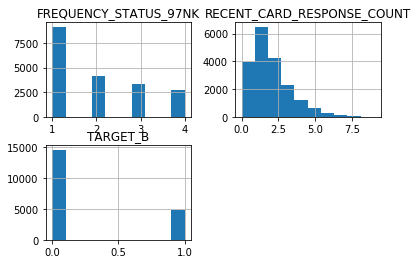

In [141]:
# We create a histogram for each input variable to get an idea of the data distribution.
# histograms
donor_data.hist()

plt.show()

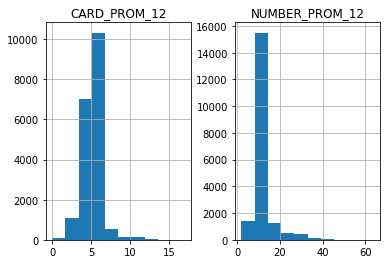

In [148]:
# Extract the donor data into a Dataframe to get an insight into the data
column_list = ['CARD_PROM_12', 'NUMBER_PROM_12']
#column_list = ['PER_CAPITA_INCOME','MEDIAN_HOUSEHOLD_INCOME','RECENT_AVG_GIFT_AMT']
donor_data = data[column_list]

donor_data.hist()
plt.show()

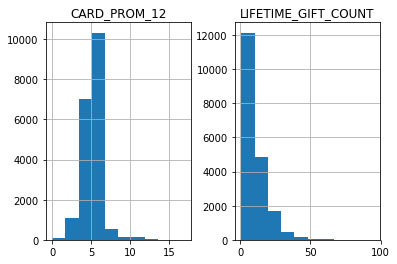

In [149]:
# Extract the donor data into a Dataframe to get an insight into the data
column_list = ['CARD_PROM_12','LIFETIME_GIFT_COUNT' ]
#column_list = ['PER_CAPITA_INCOME','MEDIAN_HOUSEHOLD_INCOME','RECENT_AVG_GIFT_AMT']
donor_data = data[column_list]

donor_data.hist()
plt.show()

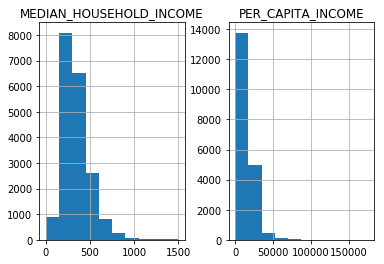

In [146]:
# Extract the donor data into a Dataframe to get an insight into the data
column_list = ['PER_CAPITA_INCOME','MEDIAN_HOUSEHOLD_INCOME']
donor_data = data[column_list]
donor_data.hist()
plt.show()

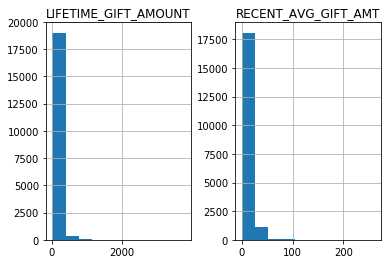

In [147]:
# Extract the donor data into a Dataframe to get an insight into the data
column_list = ['RECENT_AVG_GIFT_AMT','LIFETIME_GIFT_AMOUNT']
donor_data = data[column_list]
donor_data.hist()
plt.show()

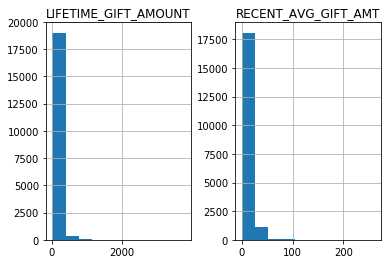

In [152]:
# Extract the donor data into a Dataframe to get an insight into the data
column_list = ['RECENT_AVG_GIFT_AMT','LIFETIME_GIFT_AMOUNT']
donor_data = data[column_list]
donor_data.hist()
plt.show()

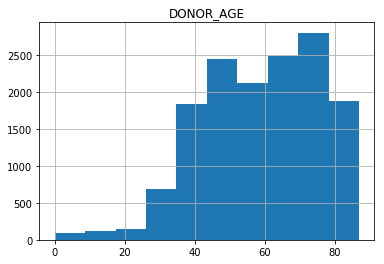

In [151]:
# Extract the donor data into a Dataframe to get an insight into the data
column_list = ['DONOR_AGE','DONOR_GENDER']
donor_data = data[column_list]
donor_data.hist()
plt.show()

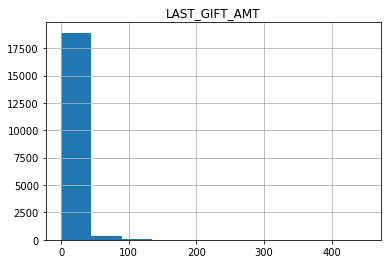

In [154]:
# Extract the donor data into a Dataframe to get an insight into the data
column_list = ['LAST_GIFT_AMT']
donor_data = data[column_list]
donor_data.hist()
plt.show()

'TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'SES', 'CLUSTER_CODE',
       'HOME_OWNER', 'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE',
       'OVERLAY_SOURCE', 'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOME_VALUE',
       'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME',
       'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'RECENCY_STATUS_96NK',
       'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
       'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
       'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
       'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER_PROM_12',
       'MONTHS_SINCE_LAST_GIFT', 'MONTHS_SINCE_FIRST_GIFT', 'FILE_AVG_GIFT',
       'FILE_CARD_GIFT'